<a href="https://colab.research.google.com/github/destefani/numpy_noise/blob/main/numpy_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import IPython.display as ipd
import librosa
import soundfile as sf
from tqdm import tqdm

from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import cm

## Sine wave

In [ ]:
sr = 22050 # sample rate
T = 2.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*440*t)                # pure sine wave at 440 Hz

In [ ]:
ipd.Audio(x, rate=sr) # load a NumPy array

## Generate random sine waves

In [ ]:
def random_sine(duration, range=[12000, 15000], sample_rate=44100):
  t = np.linspace(0, duration, int(duration*sample_rate), endpoint=False)
  frequency = np.random.randint(range[0], range[1]) # generate random int
  x = 0.5*np.sin(2*np.pi*frequency*t)              
  return x

In [ ]:
def random_sine_sequence(n_segments, pith_range, step_lenght=[0, 1]):
  sequence = np.empty(0)
  for i in tqdm(range(n_segments)):
    sine_lenght = np.random.random_sample() * np.random.randint(step_lenght[0], step_lenght[1])
    sine = random_sine(sine_lenght, pith_range)
    sequence = np.append(sequence, sine)
  return sequence

In [ ]:
sequence_1 = random_sine_sequence(1000, pith_range=[20, 70], step_lenght=[1, 2])
sequence_1.shape

In [ ]:
ipd.Audio(sequence_1[:4410000], rate=44100) # load a NumPy array

## Add sequences


In [ ]:
sequence_2 = random_sine_sequence(1000, pith_range=[3000, 7000], step_lenght=[1, 2])
sequence_2.shape

In [ ]:
ipd.Audio(sequence_2[:4410000], rate=44100) # load a NumPy array

In [ ]:
sumed_sequence = sequence_1[:4410000] + sequence_2[:4410000]

In [ ]:
ipd.Audio(sumed_sequence, rate=44100)

In [ ]:
sequence_3 = random_sine_sequence(1000, pith_range=[12000, 15000], step_lenght=[1, None])
sequence_3.shape

In [ ]:
sumed_sequence_2 = sequence_1[:4410000] + sequence_2[:4410000] + sequence_3[:4410000]

In [ ]:
ipd.Audio(sumed_sequence_2, rate=44100)

In [ ]:
def sumed_sequences(n_seq):
  sequence = np.empty(4410000)
  for n in range(n_seq):
    sequence = sequence + random_sine_sequence(1000)
  return sequence

In [ ]:
n_10_sequence = sumed_sequences(10)

In [ ]:
ipd.Audio(n_10_sequence, rate=44100)

## Stereo sequence

In [ ]:
sequence2 = np.empty(0)
for i in range(1000):
  duration = np.random.randint(0.1, 1)
  sine = random_sine(0.1)
  sequence2 = np.append(sequence2, sine)

In [ ]:
sequence.shape[0]

In [ ]:
print(sequence.shape)
print(sequence2.shape)

In [ ]:
stereo_sequence = np.stack((sequence, sequence2))
print(stereo_sequence.shape)

In [ ]:
ipd.Audio(stereo_sequence, rate=44100) # load a NumPy array



## Save audio


In [ ]:
sf.write('low_random_sequence.wav', sequence_1, 44100, subtype='PCM_24')

## Image


In [117]:
def image_from_array(array, size):
  pixels = size[0] * size[1]
  image = array[:pixels].reshape(size)
  return Image.fromarray(np.uint8(cm.gist_earth(image)*255))

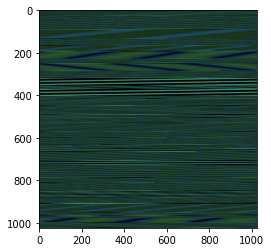

In [131]:
im_seq1 = image_from_array(sequence_1, (1024, 1024))
im_seq1.convert('RGB').save("im_seq1.jpg") 
plt.imshow(im_seq1)

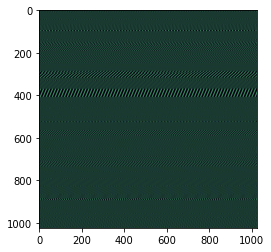

In [133]:
im_seq2 = image_from_array(sequence_2, (1024, 1024))
im_seq2.convert('RGB').save("im_seq2.jpg") 
plt.imshow(im_seq2)

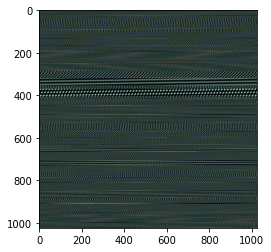

In [139]:
im_sum_seq = image_from_array(sumed_sequence, (1024, 1024))
im_sum_seq.convert('RGB').save("im_sum_seq.jpg") 
plt.imshow(im_sum_seq)

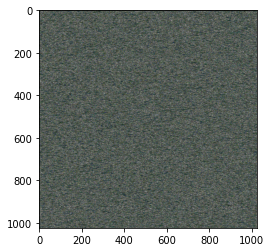

In [140]:
im_10_seq = image_from_array(n_10_sequence, (1024, 1024))
im_10_seq.convert('RGB').save("n_10_seq.jpg") 
plt.imshow(im_10_seq)